In [135]:
# import packages 
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [136]:
# set directory 
main_directory = os.getcwd().strip('notebooks')

# set file name of raw data
raw_file = 'raw_data_domain-09-03 (1).xlsx'

In [137]:
# read in raw data
raw_data = pd.read_excel(main_directory +'data/raw/' + raw_file)

In [138]:
# view data frame
raw_data

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
0,https://www.domain.com.au/26-the-glades-taylor...,26 The Glades Taylors Hill VIC 3037,400.0,"<span class=""css-in3yi3"">House</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.712841, 144.764943]","[['3 Beds'], ['2 Baths'], ['2 Parking'], []]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>*DID YOU KNOW YOU CAN BOOK AN INSPECTION O...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
1,https://www.domain.com.au/150-vearings-road-wo...,150 Vearings Road Wollert VIC 3750,$400 per week,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.5958561, 144.991903]","[['3 Beds'], ['2 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Enjoy a lifestyle unrivalled in stylish lu...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
2,https://www.domain.com.au/59a-whyte-street-col...,59A Whyte Street Coleraine VIC 3315,$300 p/w,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-pw7xmy"" data-testid=""listing-su...","[-37.5987575, 141.6939533]","[['2 Beds'], ['1 Bath'], ['2 Parking'], []]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Take advantage of terrace views over Coler...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
3,https://www.domain.com.au/4-anwyl-cl-mildura-v...,4 Anwyl Cl Mildura VIC 3500,$400 weekly,"<span class=""css-in3yi3"">House</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-34.194151, 142.1335366]","[['3 Beds'], ['2 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...","[<p>Ideally situated in a quiet street, this t...","[<tr class=""css-1a43shy"" data-testid=""neighbou..."
4,https://www.domain.com.au/2-12-lawson-street-b...,2/12 Lawson Street Balwyn North VIC 3104,590.0,"<span class=""css-in3yi3"">House</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.800306, 145.068128]","[['3 Beds'], ['3 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>A beautiful north-facing bay window soaks ...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
...,...,...,...,...,...,...,...,...,...,...
11588,https://www.domain.com.au/19-glyndon-rd-camber...,19 Glyndon Rd Camberwell VIC 3124,$600 weekly,"<span class=""css-in3yi3"">Apartment / Unit / Fl...","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.8363392, 145.0786926]","[['2 Beds'], ['2 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Lovingly cared for and located on a corner...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
11589,https://www.domain.com.au/23-4-mason-street-ne...,23/4 Mason Street Newport VIC 3015,460.0,"<span class=""css-in3yi3"">Apartment / Unit / Fl...","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.8422078, 144.8821432]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Near new designer penthouse style apartmen...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
11590,https://www.domain.com.au/1-23a-mantell-street...,1/23A Mantell Street Moonee Ponds VIC 3039,$610pw/$2651pcm,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.7639674, 144.9154754]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Key Features:<br/>- Brand new two-bedroom ...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
11591,https://www.domain.com.au/74-queen-circuit-sun...,74 Queen Circuit Sunshine VIC 3020,$440 Per Week,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.7970088, 144.8284279]","[['2 Beds'], ['2 Baths'], ['1 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>It's easy to see why this estate is called...,"[<

In [139]:
# get rid of the html text in the columns
columns = ['extra', 'property_type', 'desc_title','desc', 'neighbourhood_insights']
for column in columns: 
    raw_data[column] = raw_data[column].str.replace("<.*?>", "")


/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/1615010414.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_data[column] = raw_data[column].str.replace("<.*?>", "")


In [140]:
# examine if there are duplicates in terms of individual entered types -> none were found
print(set(raw_data['property_type']))

{'Carspace', 'Villa', 'Townhouse', 'House', 'Rural', 'Apartment / Unit / Flat', 'Retirement', 'Terrace', 'Vacant land', 'Penthouse', 'New Apartments / Off the Plan', 'Duplex', 'Acreage / Semi-Rural', 'Farm', 'Semi-Detached', 'Studio'}


In [141]:
raw_data

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
0,https://www.domain.com.au/26-the-glades-taylor...,26 The Glades Taylors Hill VIC 3037,400.0,House,Date Available: Available NowBond $1733Land ar...,"[-37.712841, 144.764943]","[['3 Beds'], ['2 Baths'], ['2 Parking'], []]",[Convenient Town House Lifestyle],[*DID YOU KNOW YOU CAN BOOK AN INSPECTION ONLI...,"[under 2037%, 20 - 3928%, 40 - 5928%, 60+7%]"
1,https://www.domain.com.au/150-vearings-road-wo...,150 Vearings Road Wollert VIC 3750,$400 per week,Townhouse,Date Available: Available NowBond $1738,"[-37.5958561, 144.991903]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[STYLISH MODERN LIVING],[Enjoy a lifestyle unrivalled in stylish luxur...,"[under 2023%, 20 - 3929%, 40 - 5925%, 60+24%]"
2,https://www.domain.com.au/59a-whyte-street-col...,59A Whyte Street Coleraine VIC 3315,$300 p/w,Townhouse,Date Available: Available NowBond $1200Land ar...,"[-37.5987575, 141.6939533]","[['2 Beds'], ['1 Bath'], ['2 Parking'], []]",[Terrace Living - Coleraine CBD],[Take advantage of terrace views over Colerain...,"[under 2019%, 20 - 3917%, 40 - 5927%, 60+38%]"
3,https://www.domain.com.au/4-anwyl-cl-mildura-v...,4 Anwyl Cl Mildura VIC 3500,$400 weekly,House,"Available from Friday, 16th September 2022Bond...","[-34.194151, 142.1335366]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[Modern Living],"[Ideally situated in a quiet street, this thre...","[under 2017%, 20 - 3917%, 40 - 5917%, 60+50%]"
4,https://www.domain.com.au/2-12-lawson-street-b...,2/12 Lawson Street Balwyn North VIC 3104,590.0,House,"Available from Friday, 30th September 2022Bond...","[-37.800306, 145.068128]","[['3 Beds'], ['3 Baths'], ['2 Parking']]",[WHAT A DELIGHT],[A beautiful north-facing bay window soaks up ...,"[under 2022%, 20 - 3928%, 40 - 5922%, 60+28%]"
...,...,...,...,...,...,...,...,...,...,...
11588,https://www.domain.com.au/19-glyndon-rd-camber...,19 Glyndon Rd Camberwell VIC 3124,$600 weekly,Apartment / Unit / Flat,Date Available: Available NowBond $2607,"[-37.8363392, 145.0786926]","[['2 Beds'], ['2 Baths'], ['2 Parking']]",[OLD WORLD STYLE &amp; CHARM],[Lovingly cared for and located on a corner bl...,"[under 2023%, 20 - 3926%, 40 - 5924%, 60+28%]"
11589,https://www.domain.com.au/23-4-mason-street-ne...,23/4 Mason Street Newport VIC 3015,460.0,Apartment / Unit / Flat,Date Available: Available NowBond $1999,"[-37.8422078, 144.8821432]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[*PLEASE REGISTER YOUR INTEREST TO BE ALERTED ...,[Near new designer penthouse style apartment w...,"[under 2021%, 20 - 3924%, 40 - 5925%, 60+30%]"
11590,https://www.domain.com.au/1-23a-mantell-street...,1/23A Mantell Street Moonee Ponds VIC 3039,$610pw/$2651pcm,Townhouse,Date Available: Available NowBond $2651,"[-37.7639674, 144.9154754]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[Luxe townhouse, prime location]",[Key Features:- Brand new two-bedroom townhous...,"[under 2019%, 20 - 3922%, 40 - 5923%, 60+36%]"
11591,https://www.domain.com.au/74-queen-circuit-sun...,74 Queen Circuit Sunshine VIC 3020,$440 Per Week,Townhouse,"Available from Tuesday, 20th September 2022","[-37.7970088, 144.8284279]","[['2 Beds'], ['2 Baths'], ['1 Parking']]",[Two Bedroom Home at the Royal!],[It's easy to see why this estate is called th...,"[under 2025%, 20 - 3929%, 40 - 5929%, 60+18%]"


In [142]:
# view the cost_text types -> inconsistent formatting it seems
raw_data.groupby('cost_text')['cost_text'].count()

cost_text
34.52                              1
40.0                               1
50.0                               1
60.0                               3
66.0                               1
                                  ..
from $320 per night off peak       1
from $580 per week                 1
from $830 pw - 1 Month min Stay    1
furnished $550/week                1
under application                  1
Name: cost_text, Length: 2348, dtype: int64

In [143]:
# filter out all the cost text that is completely numerical -> probably doesn't need cleaning
no_cleaning_cost = raw_data[pd.to_numeric(raw_data['cost_text'], errors='coerce').notnull()]

In [144]:
# new data frame with cost data not to be touched removed
raw_data2 = raw_data[~raw_data.cost_text.isin(no_cleaning_cost.cost_text)]

In [145]:
# convert all cost data to lower case
raw_data2['cost_text'] =raw_data2['cost_text'].str.lower()
raw_data2['cost_text'] =raw_data2['cost_text'].str.strip('.')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/2918010484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['cost_text'] =raw_data2['cost_text'].str.lower()
/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/2918010484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['cost_text'] =raw_data2['cost_text'].str.strip('.')


In [146]:
# get all data with week or p/w
week_data = raw_data2[(raw_data2['cost_text'].str.contains("week"))|(raw_data2['cost_text'].str.contains("p/w"))|(raw_data2['cost_text'].str.contains("pw"))]

In [147]:
# rest of data frame is anything apart from week data above -> segregate this
raw_data3 =  raw_data2[~((raw_data2['cost_text'].str.contains("week"))|(raw_data2['cost_text'].str.contains("p/w"))|(raw_data2['cost_text'].str.contains("pw")))]

In [148]:
# further segregate week data into the data that contains $ or $ -> doesn't seem to work
week_data_money = week_data[week_data['cost_text'].str.contains('$')]
week_data_no_money =  week_data[week_data['cost_text'].str.contains('$') == False]

In [149]:
# extract the value after $ -> this is the weekly rent price
week_data['cost_text'] =week_data['cost_text'].str.extract('\$([0-9,.]+)')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/2294681146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['cost_text'] =week_data['cost_text'].str.extract('\$([0-9,.]+)')


In [150]:
# remove any commas
week_data['cost_text']=week_data['cost_text'].str.replace(',', '')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/315761293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['cost_text']=week_data['cost_text'].str.replace(',', '')


In [151]:
# convert everything to float
week_data['cost_text'] = week_data['cost_text'].astype(float)

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/165954624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['cost_text'] = week_data['cost_text'].astype(float)


In [152]:
# segregate all the monthly data
month_data = raw_data3[raw_data3['cost_text'].str.contains('month')]
# segregate none-month data
raw_data4 = raw_data3[~(raw_data3['cost_text'].str.contains('month'))]

In [153]:
month_data

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
105,https://www.domain.com.au/50-mason-street-newp...,50 Mason Street Newport VIC 3015,"$3,000 per month, plus gst & outgoings",House,Date Available: Available NowBond $3000,"[-37.841798, 144.8788595]","[['4 Beds'], ['2 Baths'], ['4 Parking']]",[IDEAL MEDICAL ROOMS - MAXIMUM EXPOSURE - IN T...,[Previously operated as a medical centre but s...,"[under 2028%, 20 - 3933%, 40 - 5923%, 60+15%]"
147,https://www.domain.com.au/614-5-olive-york-way...,614/5 Olive York Way Brunswick West VIC 3055,1912.00 per month,Apartment / Unit / Flat,"Available from Friday, 30th September 2022Bond...","[-37.7587375, 144.9390345]","[['2 Beds'], ['2 Baths'], ['1 Parking']]","[MODERN TWO BEDROOM, TWO BATHROOM APARTMENT]",[The Grove presents a contemporary and truly o...,"[under 2012%, 20 - 3953%, 40 - 5921%, 60+13%]"
761,https://www.domain.com.au/5-135-anstruther-str...,5/135 Anstruther Street Echuca VIC 3564,$1474 calendar month,Apartment / Unit / Flat,"Available from Thursday, 15th September 2022Bo...","[-36.1258803, 144.7558286]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[So Central &amp; Fully Furnished],[This fully furnished unit is located less tha...,"[under 2018%, 20 - 3923%, 40 - 5924%, 60+34%]"
794,https://www.domain.com.au/464a-main-road-west-...,464A Main Road West St Albans VIC 3021,$2000 per month,House,Date Available: Available NowBond $2000Land ar...,"[-37.7422195, 144.7845306]","[['3 Beds'], ['1 Bath'], ['2 Parking'], []]",[Uniquely Modern but Vintage],"[ListedAS - Uniquely Modern but Vintage, Featu...","[under 2024%, 20 - 3937%, 40 - 5922%, 60+17%]"
963,https://www.domain.com.au/41-magnolia-drive-ec...,41 Magnolia Drive Echuca VIC 3564,$2384 calendar month,House,"Available from Friday, 14th October 2022Bond $...","[-36.1373504, 144.721378]","[['4 Beds'], ['2 Baths'], ['6 Parking']]",[Ultimate Family Living],[This spacious home is set on a large block an...,"[under 2020%, 20 - 3919%, 40 - 5917%, 60+44%]"
1310,https://www.domain.com.au/3-101-ebony-drive-pa...,3/101 Ebony Drive Pakenham VIC 3810,$1473 per calendar month,Apartment / Unit / Flat,"Available from Saturday, 17th September 2022Bo...","[-38.0644518, 145.5042976]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[CLOSE TO SHOPS],[Neat and tidy 2 Bedroom Unit situated close t...,"[under 2032%, 20 - 3935%, 40 - 5922%, 60+11%]"
1335,https://www.domain.com.au/113-63-william-stree...,113/63 William Street Abbotsford VIC 3067,"$2,200 per month",Apartment / Unit / Flat,Date Available: Available NowBond $2200,"[-37.8078616, 144.9974834]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[Two Bedroom, One Bathroom + Powder Room]",[Abbot is a stunning new development designed ...,"[under 2011%, 20 - 3950%, 40 - 5928%, 60+12%]"
2607,https://www.domain.com.au/11-howell-drive-echu...,11 Howell Drive Echuca VIC 3564,$2557 calendar month,House,"Available from Friday, 7th October 2022Bond $2360","[-36.1468508, 144.7222077]","[['4 Beds'], ['2 Baths'], ['2 Parking']]",[Family Home with a Big Shed!],"[This modern home comprises of 4 bedrooms, 2 b...","[under 2027%, 20 - 3922%, 40 - 5926%, 60+25%]"
3242,https://www.domain.com.au/62-william-street-st...,62 william street St Albans VIC 3021,"$2,500/month",House,Date Available: Available NowBond $2500,"[-37.737358, 144.815952]","[['2 Beds'], ['1 Bath'], []]",[SPACIOUS HOUSE FOR FAMILY BUSINESS],[ListedAS - SPACIOUS HOUSE FOR FAMILY BUSINESS...,"[under 2025%, 20 - 3932%, 40 - 5926%, 60+16%]"
3250,https://www.domain.com.au/marina-berth-martha-...,Marina Berth Martha Cove Waterway Safety Beach...,from $1000 per month,House,Date Available: Available Now,"[-38.3180829, 144.9880165]","[['1 Bed'], ['1 Bath'], []]",[Marina Berths in Martha Cove],"[In a secure inland harbour at Martha Cove, wi...","[under 2024%, 20 - 3919%, 40 - 5923%, 60+34%]"


In [82]:
# extract the value after $ -> this is the monthly rent price
month_data['cost_text'] =month_data['cost_text'].str.extract('\$([0-9,.]+)')
# remove any commas
month_data['cost_text']=month_data['cost_text'].str.replace(',', '')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/2152846383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['cost_text'] =month_data['cost_text'].str.extract('\$([0-9,.]+)')
/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/2152846383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['cost_text']=month_data['cost_text'].str.replace(',', '')


In [86]:
# drop any na values
month_data = month_data.dropna()

In [90]:
# convert month data to week data by x 12 and /52
month_data['cost_text'] = month_data['cost_text'].astype(float)*12/52

In [92]:
# segregate all rows that contain numbers
contains_numbers = raw_data4[raw_data4.cost_text.str.contains('.*[0-9].*', regex=True)]
# again split the dataframe
raw_data5 = raw_data4[~(raw_data4.cost_text.str.contains('.*[0-9].*', regex=True))]

In [97]:
# segregate anything that may have w in it -> per week
contains_numbers_week = contains_numbers[(contains_numbers.cost_text.str.contains('wk')|(contains_numbers.cost_text.str.contains('p.w'))|(contains_numbers.cost_text.str.contains('pw')))]

# get the non-week numbers data
contains_numbers_non_week = contains_numbers[~((contains_numbers.cost_text.str.contains('wk')|(contains_numbers.cost_text.str.contains('p.w'))|(contains_numbers.cost_text.str.contains('pw'))))]


In [98]:
# look at the contains_number non_week data -> doesn't seem to have useful information-> exclude this as it may add noise
contains_numbers_non_week

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
56,https://www.domain.com.au/38-buffalo-creek-roa...,38 Buffalo Creek Road Myrtleford VIC 3737,from $800 per night,Villa,Bond $500,"[-36.5781606, 146.7068584]","[['5 Beds'], ['2 Baths'], ['4 Parking']]",['TATOONIE'],[TATOONIE is a 6-star property set in the tran...,"[under 2019%, 20 - 3911%, 40 - 5936%, 60+35%]"
183,https://www.domain.com.au/66-hargreaves-street...,66 Hargreaves Street Bendigo VIC 3550,$670 - fully furnished,House,"Available from Thursday, 31st August 2023Bond ...","[-36.7532444, 144.2891422]","[['3 Beds'], ['1 Bath'], ['1 Parking']]",[FULLY FURNISHED - CONTACT AGENT FOR AVAILABIL...,[Stunningly renovated in a prime location clos...,"[under 2026%, 20 - 3926%, 40 - 5929%, 60+19%]"
195,https://www.domain.com.au/4-4a-south-street-ha...,4/4a South Street Hadfield VIC 3046,$260 to $280,Apartment / Unit / Flat,Date Available: Available NowBond $1127,"[-37.7154003, 144.9513918]","[['1 Bed'], ['1 Bath'], ['1 Parking']]",[Central Location and ready to call home!],[A renovated spacious one bedroom first level ...,"[under 2023%, 20 - 3920%, 40 - 5927%, 60+30%]"
335,https://www.domain.com.au/strathfieldsaye-bend...,Strathfieldsaye Bendigo VIC 3550,rent2own,House,Bond $1800Land area 582m²Internal area 205m²,"[-36.7570157, 144.2793906]","[['4 Beds'], ['2 Baths'], ['2 Parking'], []]",[Rent2own Homes $25K Building Grant end 31.12.20],"[Why choose Rent to Own, How does this work?, ...","[under 2017%, 20 - 3931%, 40 - 5926%, 60+26%]"
388,https://www.domain.com.au/2-holt-street-bendig...,2 Holt Street Bendigo VIC 3550,$670 - fully furnished,House,"Available from Saturday, 30th September 2023Bo...","[-36.75437900000001, 144.2871485]","[['3 Beds'], ['2 Baths'], ['1 Parking']]",[FULLY FURNISHED - CONTACT AGENT FOR AVAILABIL...,[Fully renovated throughout. Location close to...,"[under 2017%, 20 - 3931%, 40 - 5926%, 60+26%]"
...,...,...,...,...,...,...,...,...,...,...
11286,https://www.domain.com.au/1-46-koonawarra-stre...,1/46 Koonawarra Street Clayton VIC 3168,$310 water & electricity included,Studio,Date Available: Available Now,"[-37.9104919, 145.1250605]","[['1 Bed'], ['1 Bath'], []]",[Studio Apartment Only minutes from Monash Uni...,[Excellent Location !! More studios are availa...,"[under 208%, 20 - 3973%, 40 - 598%, 60+11%]"
11328,https://www.domain.com.au/2-31-booth-street-go...,2/31 Booth Street Golden Square VIC 3555,$640 - fully furnished,House,"Available from Sunday, 8th January 2023Bond $2781","[-36.7671327, 144.259216]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[FULLY FURNISHED - CONTACT AGENT FOR AVAILABIL...,[Three bedroom townhouse located just minutes ...,"[under 2021%, 20 - 3931%, 40 - 5927%, 60+21%]"
11356,https://www.domain.com.au/36-arnold-street-ben...,36 Arnold Street Bendigo VIC 3550,$650 - fully furnished,House,"Available from Monday, 12th September 2022Bond...","[-36.7524813, 144.2870098]","[['3 Beds'], ['2 Baths'], ['1 Parking']]",[FULLY FURNISHED - AVAILABLE MID SEPTEMBER],[FULLY FURNISHED. This beautifully renovated p...,"[under 2026%, 20 - 3926%, 40 - 5929%, 60+19%]"
11423,https://www.domain.com.au/1-60-the-avenue-prah...,1/60 The Avenue Prahran VIC 3181,$170 to $240,Apartment / Unit / Flat,Date Available: Available NowBond $340,"[-37.853143, 144.99859]","[['1 Bed'], ['1 Bath'], []]",[Rooming House Melbourne Prahran Windsor South...,[ALL ENQUIRIES STRICTLY BY EMAIL ONLY (no exce...,"[under 2017%, 20 - 3949%, 40 - 5920%, 60+14%]"


In [103]:
# extract the value after $ -> this is the monthly rent price
contains_numbers_week['cost_text'] =contains_numbers_week['cost_text'].str.extract('\$([0-9,.]+)')
# remove any commas
contains_numbers_week['cost_text']=contains_numbers_week['cost_text'].str.replace(',', '')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/498207624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contains_numbers_week['cost_text'] =contains_numbers_week['cost_text'].str.extract('\$([0-9,.]+)')
/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_54122/498207624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contains_numbers_week['cost_text']=contains_numbers_week['cost_text'].str.replace(',', '')


In [71]:
# view the remaining dataframe-> doesn't seem to have anything usefule left
raw_data5

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
11,https://www.domain.com.au/51-were-street-brigh...,51 Were Street Brighton VIC 3186,contact agent,House,NaN,"[-37.9245941, 144.993133]","[['4 Beds'], ['2 Baths'], ['3 Parking']]",[Beachside Luxury Designed to Entertain],[Inspection via appointment. Please call Tom 0...,"[under 2028%, 20 - 3921%, 40 - 5925%, 60+26%]"
13,https://www.domain.com.au/2105-368-st-kilda-ro...,2105/368 St Kilda Road Melbourne VIC 3004,the deal: under offer,Apartment / Unit / Flat,Date Available: Available NowBond $10000Intern...,"[-37.8318086, 144.9710272]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[THE DEAL],[OBVIOUSUpon entering your attention is instan...,"[under 2010%, 20 - 3920%, 40 - 5923%, 60+47%]"
47,https://www.domain.com.au/ssc-37-caroville-dri...,SSC/37 Caroville Drive Warrnambool VIC 3280,enquire for availability,House,Date Available: Available Now,"[-38.3810726, 142.5179816]","[['1 Bed'], ['1 Bath'], []]",[Seniors Rental Community - Single Unit with K...,[This lovely ground-level single unit is part ...,"[under 2025%, 20 - 3922%, 40 - 5922%, 60+31%]"
53,https://www.domain.com.au/168-westcott-parade-...,168 Westcott Parade Rockbank VIC 3335,contact agent - call us to book an inspection,Acreage / Semi-Rural,Date Available: Available NowBond $6518,"[-37.728685, 144.654902]","[['5 Beds'], ['2 Baths'], ['4 Parking']]",[Ranch Style Home],[THE ELEET Caroline Springs proudly presents t...,"[under 2020%, 20 - 3925%, 40 - 5934%, 60+21%]"
119,https://www.domain.com.au/chelsea-vic-3196-117...,Chelsea VIC 3196,leased,Apartment / Unit / Flat,Date Available: Available Now,"[-38.051111, 145.121944]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[Leased],"[This well presented 2 bedroom unit, is situat...","[under 2019%, 20 - 3924%, 40 - 5925%, 60+32%]"
...,...,...,...,...,...,...,...,...,...,...
11391,https://www.domain.com.au/brighton-vic-3186-76...,Brighton VIC 3186,fine furnished residences at westprecinct,Apartment / Unit / Flat,NaN,"[-37.9043383, 144.9931825]","[['2 Beds'], ['2 Baths'], ['2 Parking']]","[Looking for a convenient, spacious and immacu...",[*Private inspections only at suggested times ...,"[under 2025%, 20 - 3921%, 40 - 5928%, 60+25%]"
11401,https://www.domain.com.au/5-wattle-tree-lane-f...,5 Wattle Tree Lane Frankston VIC 3199,leased,House,Date Available: Available NowBond $1760,"[-38.1534676, 145.1567485]","[['3 Beds'], ['1 Bath'], ['2 Parking']]",[Central location with quick access to Peninsu...,[How to apply: Once you have attended one of t...,"[under 2025%, 20 - 3932%, 40 - 5923%, 60+20%]"
11491,https://www.domain.com.au/17-tarawill-street-r...,17 Tarawill Street Rye VIC 3941,under application,House,Date Available: Available NowBond $2607,"[-38.386315, 144.8109585]","[['4 Beds'], ['2 Baths'], ['2 Parking']]",[Leased],"[This home has been Leased , Easy walk to the...","[under 2022%, 20 - 3919%, 40 - 5926%, 60+34%]"
11526,https://www.domain.com.au/ballarat-central-vic...,Ballarat Central VIC 3350,why rent when you can buy. rent to own today,House,Date Available: Available NowBond $1800,"[-37.5610117, 143.8549159]","[['4 Beds'], ['2 Baths'], ['2 Parking']]",[Rent to Own Today! (Full Time Employment Requ...,"[No Deposit, No Worries! , Low Deposit Finance...","[under 2022%, 20 - 3927%, 40 - 5927%, 60+25%]"


In [155]:
# join remaining datasets
final_dataset = pd.concat([week_data, no_cleaning_cost,month_data,contains_numbers_week])

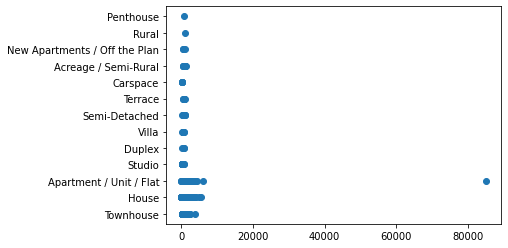

In [121]:
# scatter the dataset to see if there are any outliers -> there is one that is 8000; probably an error?
plt.scatter(final_dataset['cost_text'],final_dataset['property_type'])

In [123]:
# examine max
final_dataset['cost_text'].astype(float).max()

85000.0

In [124]:
# examine min
final_dataset['cost_text'].astype(float).min()

18.0

In [125]:
# examine median
final_dataset['cost_text'].astype(float).median()

450.0

In [126]:
# examine sd
final_dataset['cost_text'].astype(float).std()

848.6051574100126

In [127]:
# examine mean
final_dataset['cost_text'].astype(float).mean()

520.1474697291834

In [132]:
# convert cost to float
final_dataset['cost_text']=final_dataset['cost_text'].astype(float)

In [134]:
final_dataset.sort_values(by = ['cost_text'])

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
3591,https://www.domain.com.au/5-greiner-court-tong...,5 Greiner Court Tongala VIC 3621,18.000000,House,Date Available: Available NowBond $150,"[-36.253557, 144.944557]",[],[Tongala Storage Units],[Storage Units available in convenient locatio...,"[under 2026%, 20 - 3927%, 40 - 5922%, 60+25%]"
3321,https://www.domain.com.au/5-9-greed-road-kyabr...,5-9 Greed Road Kyabram VIC 3620,18.923077,House,Date Available: Available NowBond $150,"[-36.3047596, 145.0348779]",[],[Storage Sheds],[Storage Sheds available in convenient central...,[]
8246,https://www.domain.com.au/14-jubilee-street-my...,14 Jubilee Street Myrtleford VIC 3737,21.923077,House,Date Available: Available NowBond $95,"[-36.554159, 146.7208003]",[],[Need More Room? Self storage Is The Answer!],[Whether you need personal storage for seasona...,"[under 2024%, 20 - 3920%, 40 - 5926%, 60+30%]"
7754,https://www.domain.com.au/47-chambers-street-m...,47 Chambers Street Myrtleford VIC 3737,25.384615,House,Date Available: Available NowBond $110,"[-36.5530096, 146.7188613]",[],[Need More Room? Self storage Is The Answer!],[Whether you need personal storage for seasona...,"[under 2024%, 20 - 3920%, 40 - 5926%, 60+30%]"
4177,https://www.domain.com.au/58-saleyards-road-be...,58 Saleyards Road Benalla VIC 3672,26.000000,House,Bond $100,"[-36.5380049, 145.9927626]",[],[NORTH EAST STORAGE - 58 SALEYARDS ROAD],[Benalla's newest self storage facilitySTAGE 3...,"[under 2022%, 20 - 3918%, 40 - 5932%, 60+28%]"
...,...,...,...,...,...,...,...,...,...,...
11452,https://www.domain.com.au/176-skene-street-war...,176 Skene Street Warrnambool VIC 3280,NaN,House,Date Available: Available NowBond $2166,"[-38.3806705, 142.48967]","[['3 Beds'], ['1 Bath'], ['1 Parking']]",['Annclaire'],[**Please apply for this property using the on...,"[under 2019%, 20 - 3930%, 40 - 5926%, 60+25%]"
11508,https://www.domain.com.au/4-palmaston-drive-gr...,4 Palmaston Drive Greenvale VIC 3059,NaN,House,Date Available: Available NowBond $2817,"[-37.6459183, 144.8724653]","[['4 Beds'], ['2 Baths'], ['2 Parking']]",[LUXURY FAMILY HOME - SOUGHT AFTER GREENVALE],[This brand new 4 bedroom lux family home with...,"[under 2022%, 20 - 3910%, 40 - 5928%, 60+40%]"
8392,https://www.domain.com.au/86-centenary-street-...,86 Centenary Street Seaford VIC 3198,NaN,House,"Available from Tuesday, 6th September 2022Bond...","[-38.1106408, 145.1584733]","[['3 Beds'], ['1 Bath'], ['4 Parking']]",[Solid 3 bedroom home with plenty of space!],"[Well positioned on 856m2, this solidly constr...","[under 2031%, 20 - 3926%, 40 - 5926%, 60+17%]"
10160,https://www.domain.com.au/40-radiata-street-fr...,40 Radiata Street Frankston North VIC 3200,NaN,House,Date Available: Available NowBond $1673,"[-38.1173289, 145.1551099]","[['3 Beds'], ['1 Bath'], []]",[Renovated Inside! Huge Backyard!],[This 3 bedroom home is located in a popular p...,"[under 2025%, 20 - 3930%, 40 - 5921%, 60+24%]"
